In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras_tuner as kt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
%matplotlib inline 

df = pd.read_csv('../Data Science/Kaggle_data/Housing.csv')

In [2]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.shape

(545, 13)

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Text(0, 0.5, 'Count')

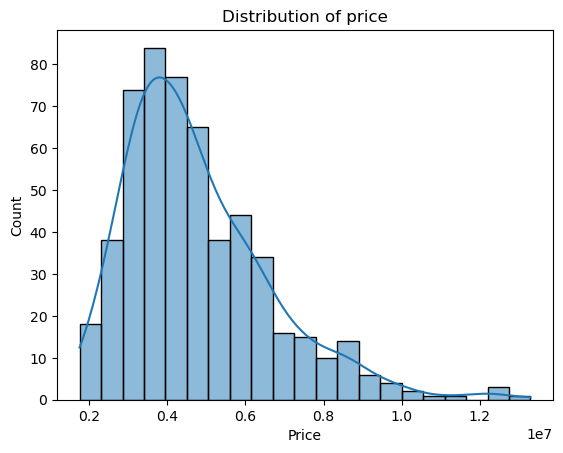

In [7]:
plt.figure()
sns.histplot(df['price'], kde=True)
plt.title('Distribution of price')
plt.xlabel('Price')
plt.ylabel('Count')

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


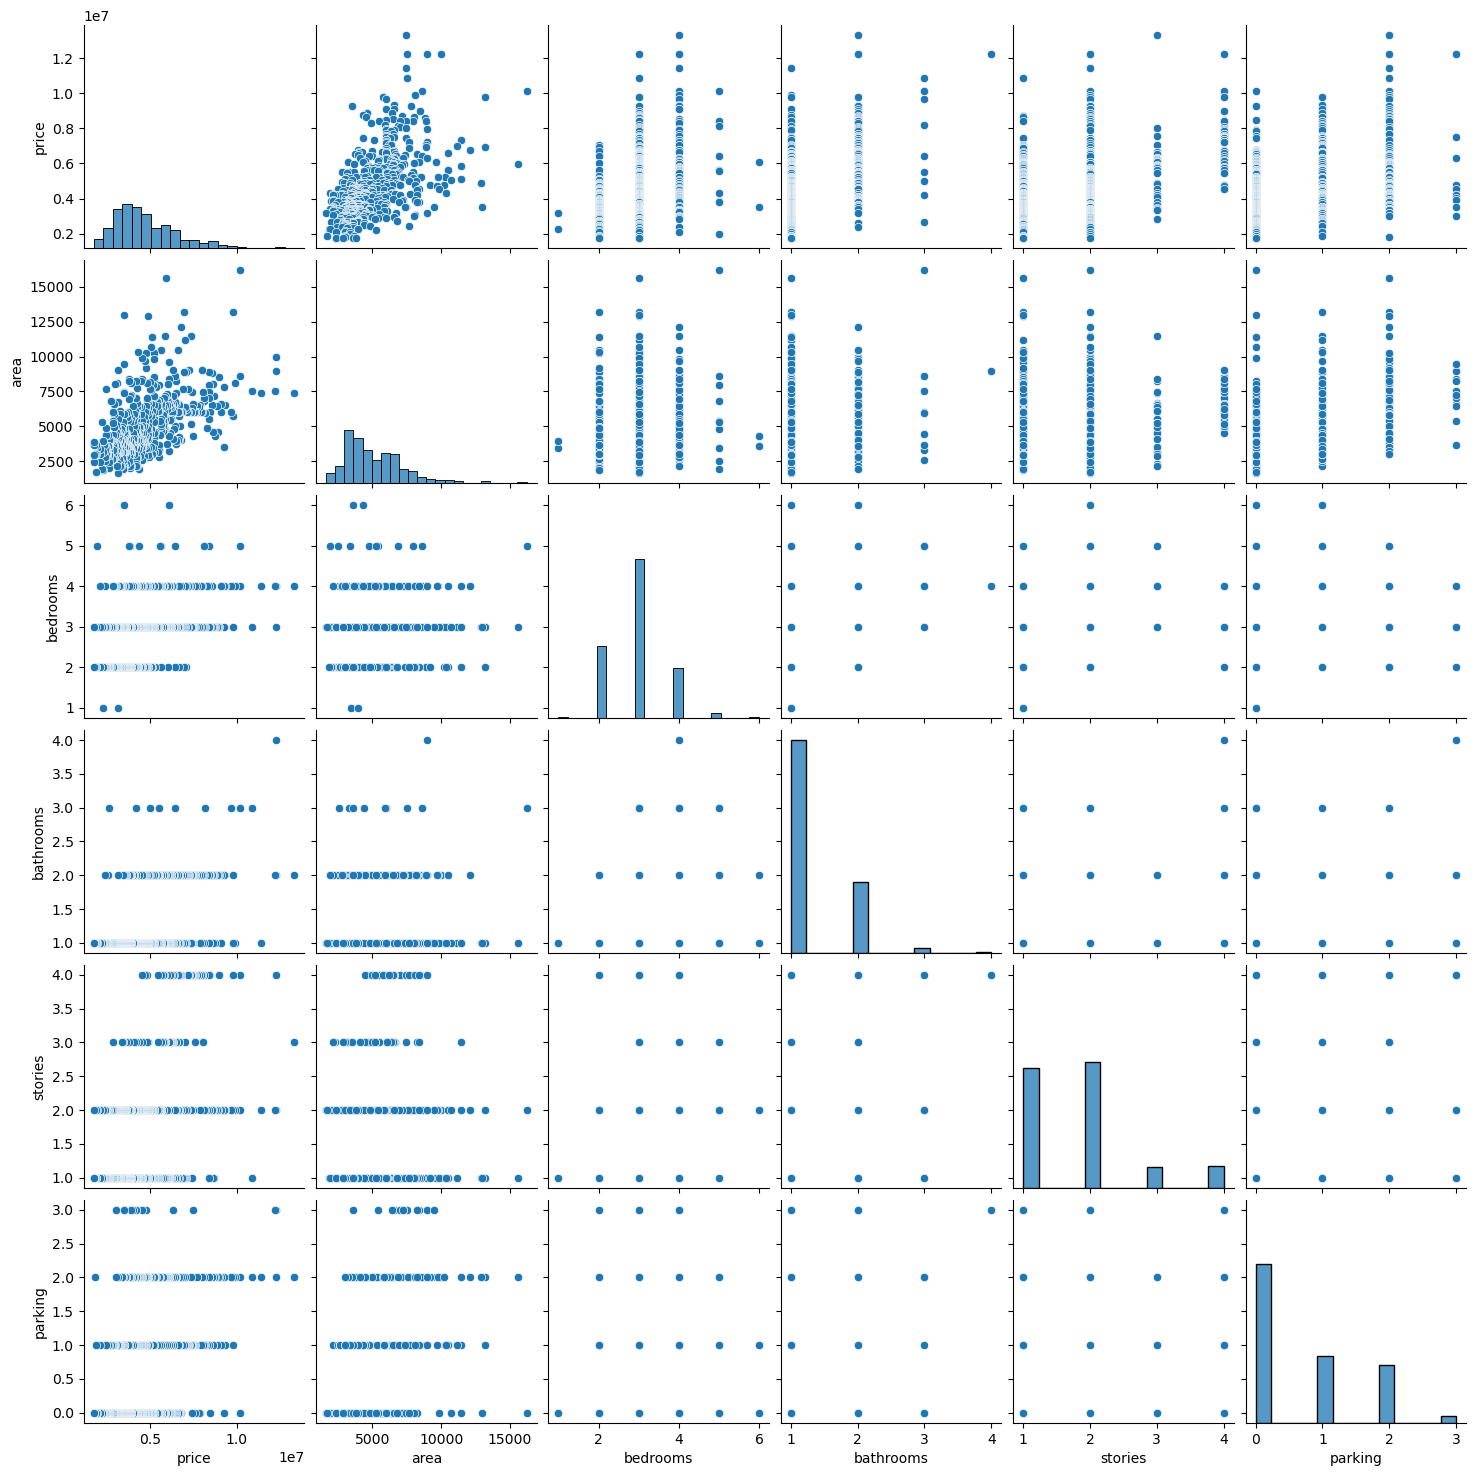

In [8]:
sns.pairplot(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])

<Axes: xlabel='parking', ylabel='price'>

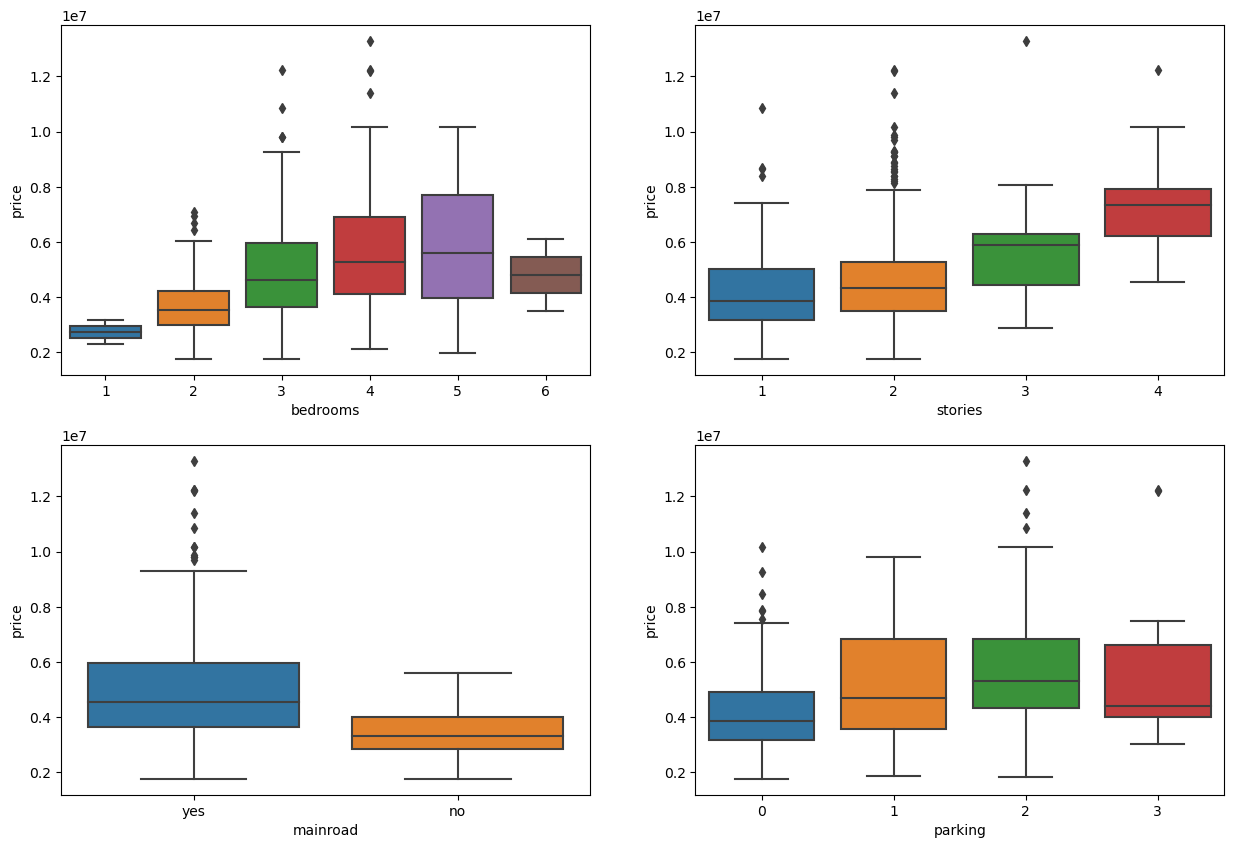

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(ax=ax[0, 0], data=df, x='bedrooms', y='price')
sns.boxplot(ax=ax[0, 1], data=df, x='stories', y='price')
sns.boxplot(ax=ax[1, 0], data=df, x='mainroad', y='price')
sns.boxplot(ax=ax[1, 1], data=df, x='parking', y='price')

<Axes: xlabel='mainroad', ylabel='count'>

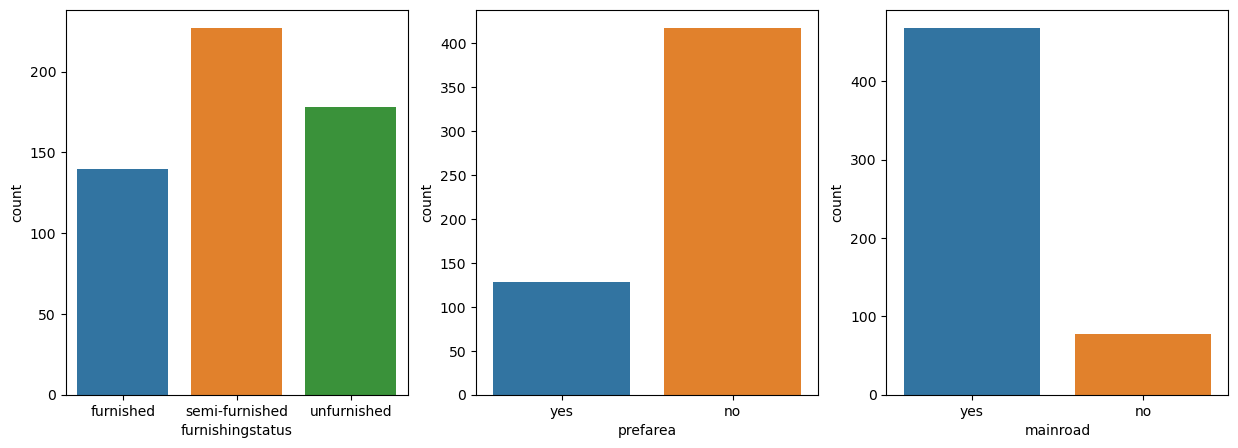

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(ax=ax[0], data=df, x='furnishingstatus')
sns.countplot(ax=ax[1], data=df, x='prefarea')
sns.countplot(ax=ax[2], data=df, x='mainroad')

Text(0, 0.5, 'Count')

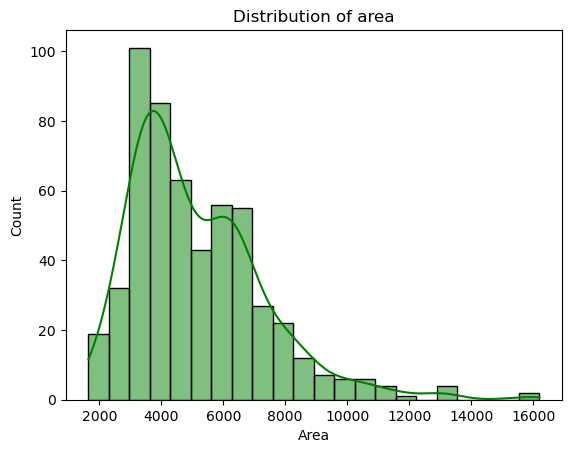

In [11]:
plt.figure()
sns.histplot(df['area'], kde=True, color='g')
plt.title('Distribution of area')
plt.xlabel('Area')
plt.ylabel('Count')

In [12]:
enc_data = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

enc_data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False


<Axes: >

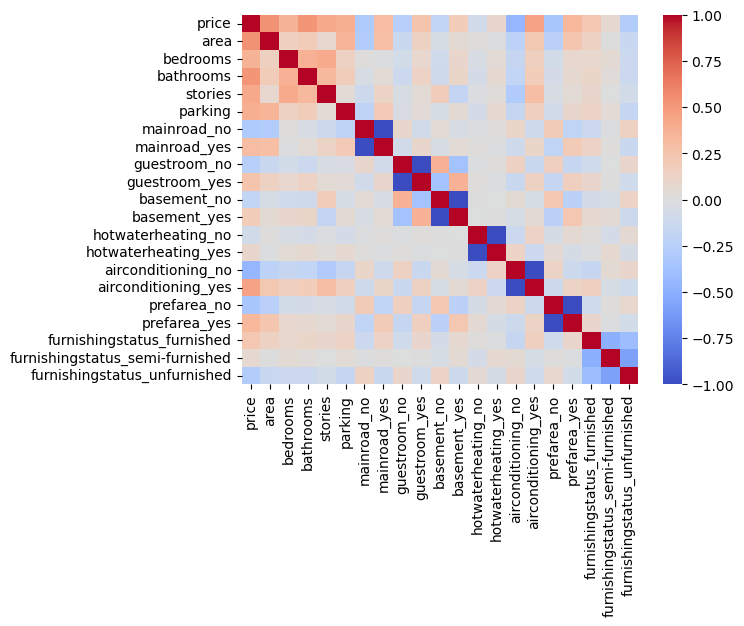

In [13]:
sns.heatmap(enc_data.corr(), cmap='coolwarm')

In [14]:
enc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_no                      545 non-null    bool 
 7   mainroad_yes                     545 non-null    bool 
 8   guestroom_no                     545 non-null    bool 
 9   guestroom_yes                    545 non-null    bool 
 10  basement_no                      545 non-null    bool 
 11  basement_yes                     545 non-null    bool 
 12  hotwaterheating_no               545 non-null    b

In [15]:
X = enc_data.drop(['price'], axis=1)
Y = enc_data['price']

In [16]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
Y = Y.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(Y)

In [17]:
x_train0, x_test, y_train0, y_test = train_test_split(x_scaled, y_scaled, test_size=0.25, random_state=100)
x_train, x_cv, y_train, y_cv = train_test_split(x_train0, y_train0, test_size=0.25, random_state=100)

x_train.shape

(306, 20)

In [18]:
def build_model(hp):
    model = Sequential()
    counter = 0
    
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        if counter == 0:
            model.add(
                Dense(
                    hp.Int('units '+str(i), min_value=8, max_value=128,step=8),
                    activation=hp.Choice('activation '+str(i), values=['relu', 'tanh', 'sigmoid']),
                    input_dim=20
                )
            )
            model.add(Dropout(hp.Choice('dropout '+str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        else:
            model.add(
                Dense(
                    hp.Int('units '+str(i), min_value=8, max_value=128,step=8),
                    activation=hp.Choice('activation '+str(i), values=['relu', 'tanh', 'sigmoid'])
                )
            )
            model.add(Dropout(hp.Choice('dropout '+str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        counter += 1
    
    model.add(Dense(1, activation='linear'))
    
    model.compile(
        optimizer=hp.Choice('optimizer', values=['rmsprop', 'sgd', 'adam', 'nadam', 'adadelta']),
        loss='mean_squared_error',
        metrics=['mean_absolute_error']
    )
    
    return model

In [19]:
tuner = kt.RandomSearch(build_model,
                        objective='val_loss',
                        max_trials=5,
                        directory='Models',
                        project_name='HousingRegressionNN'
                       )

Reloading Tuner from Models\HousingRegressionNN\tuner0.json


In [20]:
tuner.search(x_train, y_train, epochs=10, validation_data=(x_cv, y_cv))

In [21]:
model_hp = tuner.get_best_models(num_models=1)[0]
model_hp.fit(x_train, y_train, epochs=30, validation_data=(x_cv, y_cv))

Epoch 1/30
10/10 [==============================] - 1s 23ms/step - loss: 2622620434432.0000 - mean_absolute_error: 639851.3750 - val_loss: 115929720.0000 - val_mean_absolute_error: 10767.0674
Epoch 2/30
10/10 [==============================] - 0s 6ms/step - loss: 6795699712.0000 - mean_absolute_error: 64293.6875 - val_loss: 43856004.0000 - val_mean_absolute_error: 6622.3867
Epoch 3/30
10/10 [==============================] - 0s 5ms/step - loss: 5703602176.0000 - mean_absolute_error: 59096.7109 - val_loss: 552252352.0000 - val_mean_absolute_error: 23500.0488
Epoch 4/30
10/10 [==============================] - 0s 5ms/step - loss: 5762421760.0000 - mean_absolute_error: 59360.0273 - val_loss: 866509184.0000 - val_mean_absolute_error: 29436.5273
Epoch 5/30
10/10 [==============================] - 0s 5ms/step - loss: 5717874176.0000 - mean_absolute_error: 58938.5352 - val_loss: 1256090624.0000 - val_mean_absolute_error: 35441.3711
Epoch 6/30
10/10 [==============================] - 0s 5ms/st

5/5 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Actual vs. Predicted')

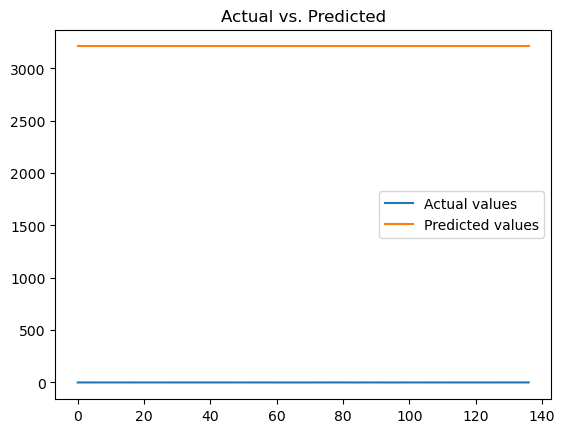

In [22]:
y_pred = model_hp.predict(x_test)
y_pred_scaled = scaler.fit_transform(y_pred)
plt.plot(np.arange(len(y_test)), y_test, label='Actual values')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted values')
plt.legend()
plt.title('Actual vs. Predicted')

In [23]:
from sklearn.metrics import mean_absolute_error

print('Mean abs error:', mean_absolute_error(y_test, y_pred) )

Mean abs error: 3209.0050787298164
